In [1]:
# Cell 1: Import libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
# Cell 2: Load and prepare the dataset
df = pd.read_csv("dataset_racao_02042025.csv", delimiter=";")

In [3]:
# Remove rows with missing values
df = df.dropna()

# Convert 'c05' column to numeric, coercing errors to NaN
df['c05'] = pd.to_numeric(df['c05'], errors='coerce')


# Convert 'aviario' column to object type
df['aviario'] = df['aviario'].astype(object)

# Convert pesos to numeric, handling commas and coercing errors to NaN
df['peso.7d'] = df['peso.7d'].astype(str).str.replace(',', '.', regex=False).astype(float)
df['peso.14d'] = df['peso.7d'].astype(str).str.replace(',', '.', regex=False).astype(float)
df['peso.21d'] = df['peso.7d'].astype(str).str.replace(',', '.', regex=False).astype(float)
df['peso.28d'] = df['peso.7d'].astype(str).str.replace(',', '.', regex=False).astype(float)
df['peso.35d'] = df['peso.7d'].astype(str).str.replace(',', '.', regex=False).astype(float)
df['peso.42d'] = df['peso.7d'].astype(str).str.replace(',', '.', regex=False).astype(float)

#Convert all mult.icolumns to numeric, handling commas and coercing errors to NaN
df['mult.7d'] = df['mult.7d'].astype(str).str.replace(',', '.', regex=False).astype(float)
df['mult.14d'] = df['mult.7d'].astype(str).str.replace(',', '.', regex=False).astype(float)
df['mult.21d'] = df['mult.7d'].astype(str).str.replace(',', '.', regex=False).astype(float)
df['mult.28d'] = df['mult.7d'].astype(str).str.replace(',', '.', regex=False).astype(float)
df['mult.35d'] = df['mult.7d'].astype(str).str.replace(',', '.', regex=False).astype(float)
df['mult.42d'] = df['mult.7d'].astype(str).str.replace(',', '.', regex=False).astype(float)




print(df.head())
df.info()

  aviario  fb.pre_inicial  fb.inicial_1  fb.inicial_2  fb.crescimento  \
0     938             240           830          1030            1460   
1    1284             240           840          1040            1700   
2     101             270           990          1020            2050   
3     829             240           930           990            1990   
4     637             270           690          1370            2100   

   fb.abate  cap_silo  tipo_aviario  global mort_inicial  ... peso.14d  \
0      2110     36000             2       1         0,67  ...   0.2000   
1      2210     36000             3       0         1,02  ...   0.1905   
2      2080     32000             2       0         0,86  ...   0.1920   
3      1580     40000             2       0         1,05  ...   0.1875   
4      1880     28000             1       0          1,4  ...   0.2040   

  mult.14d peso.21d mult.21d peso.28d mult.28d peso.35d  mult.35d  peso.42d  \
0     4.47   0.2000     4.47   0.2000

In [4]:
numeric_columns = []
for col in df.columns:
    if pd.api.types.is_numeric_dtype(df[col]):
        numeric_columns.append(col)

continuous_vars = [col for col in numeric_columns if df[col].nunique() > 20]
    
scaler = StandardScaler()
df[continuous_vars] = scaler.fit_transform(df[continuous_vars])


In [5]:
# Cell 3: Calculate the correction coefficient

# Convert 'iep' column to numeric, handling commas and coercing errors to NaN
df['iep'] = df['iep'].astype(str).str.replace(',', '.', regex=False).astype(float)

# Calculate the mean IEP
iep_median = df['iep'].median()

# Calculate the correction coefficient as iep_mean / iep_aviario
# Ensure coefficient is between 0.8 and 1.2
df['coef_correcao'] = iep_median / df['iep']
df['coef_correcao'] = df['coef_correcao'].clip(lower=0.80, upper=1.20)

print(df[['iep', 'coef_correcao']].head(15))

print(f"Median IEP: {iep_median}")

      iep  coef_correcao
0   398.0       0.947236
1   379.0       0.994723
2   373.0       1.010724
3   373.0       1.010724
4   359.0       1.050139
5   396.0       0.952020
6   358.0       1.053073
7   383.0       0.984334
8   375.5       1.003995
9   377.0       1.000000
10  398.0       0.947236
11  396.0       0.952020
12  378.0       0.997354
13  374.0       1.008021
14  382.0       0.986911
Median IEP: 377.0


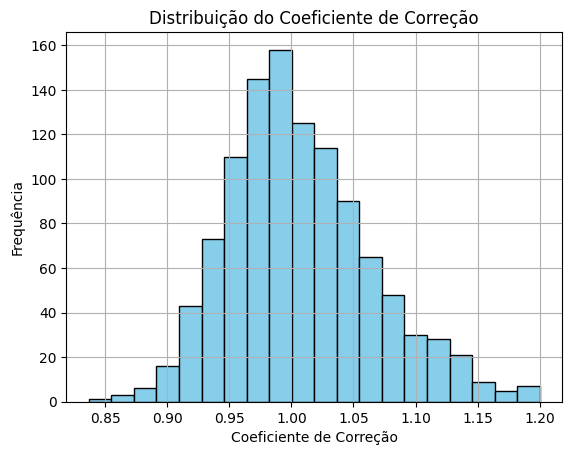

In [6]:
# Cell 4: Apply the correction coefficient to feed budget phases
fases = ['fb.pre_inicial', 'fb.inicial_1', 'fb.inicial_2', 'fb.crescimento', 'fb.abate']
for fase in fases:
    df[f'{fase}_ajustado'] = df[fase] * df['coef_correcao']

# Cell 5: Validation - Plot coefficient distribution
plt.hist(df['coef_correcao'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribuição do Coeficiente de Correção')
plt.xlabel('Coeficiente de Correção')
plt.ylabel('Frequência')
plt.grid(True)
# plt.savefig('coef_distribution.png')  # Save instead of showing


plt.show()


c:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Correlation Matrix:
                         coef_correcao  tipo_aviario       gmd       iep  \
coef_correcao                 1.000000     -0.301986 -0.780197 -0.996870   
tipo_aviario                 -0.301986      1.000000  0.286235  0.296716   
gmd                          -0.780197      0.286235  1.000000  0.785556   
iep                          -0.996870      0.296716  0.785556  1.000000   
mortalidade                   0.515036     -0.019579 -0.161002 -0.515723   
caaj                          0.778340     -0.277259 -0.511053 -0.779069   
c07                           0.305857     -0.141462 -0.281511 -0.301502   
c08                          -0.401634      0.154242  0.370880  0.410064   
i09                          -0.354786      0.184758  0.338455  0.363954   
class_av                     -0.319324      0.435639  0.298726  0.320805   
fb.pre_inicial_ajustado       0.770778     -0.452975 -0.633350 -0.764192   

                         mortalidade      caaj       c07       c08 

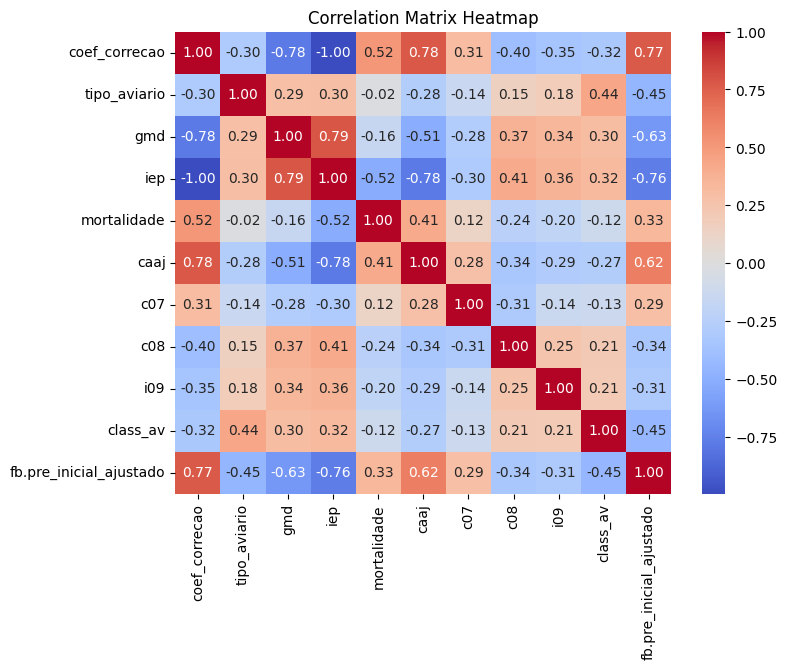

In [7]:
import seaborn as sns

# Cell 6: Validation - Check correlations
# Convert columns to numeric, handling commas
df['mortalidade'] = df['mortalidade'].astype(str).str.replace(',', '.', regex=False).astype(float)
df['gmd'] = df['gmd'].astype(str).str.replace(',', '.', regex=False).astype(float)
df['caaj'] = df['caaj'].astype(str).str.replace(',', '.', regex=False).astype(float)

# Identify columns with correlation > 0.3 with 'coef_correcao'
relevant_cols = ['coef_correcao']
for col in df.columns:
    if pd.api.types.is_numeric_dtype(df[col]):
        correlation = df['coef_correcao'].corr(df[col])
        if abs(correlation) > 0.3 and col != 'coef_correcao':
            relevant_cols.append(col)

correlation_matrix = df[relevant_cols].corr()
print("Correlation Matrix:")
print(correlation_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

In [8]:
# Cell 7: Export the adjusted results
df.to_csv('feed_budget_ajustado.csv', index=False)
print("Processing complete. Adjusted feed budgets saved to 'feed_budget_ajustado.csv'.")

Processing complete. Adjusted feed budgets saved to 'feed_budget_ajustado.csv'.


In [64]:
# Cell 8: Export coef_correcao for supplier
# Select relevant columns (aviario and coef_correcao)
coef_export = df[['aviario', 'coef_correcao']].copy()
coef_export['coef_correcao'] = coef_export['coef_correcao'].astype(float)
coef_export.to_excel('coef_correcao_aviarios.xlsx', index=False)
print("Correction coefficients exported to 'coef_correcao_aviarios.xlsx'.")

Correction coefficients exported to 'coef_correcao_aviarios.xlsx'.


In [65]:
# Cell 4: Apply the correction coefficient to feed budget phases
fases = ['fb.pre_inicial', 'fb.inicial_1', 'fb.inicial_2', 'fb.crescimento', 'fb.abate']
for fase in fases:
    df[f'{fase}_ajustado'] = df[fase] * df['coef_correcao']

In [66]:
# Cell 5: Simulate expected consumption as a proxy
# Assume expected consumption is the original feed budget adjusted by an IEP-based factor
# Higher IEP implies lower consumption (more efficient), so we invert the coefficient
df['expected_consumption'] = 0
for fase in fases:
    df['expected_consumption'] += df[fase] * (iep_mean / df['iep']).clip(lower=0.8, upper=1.2)

# Calculate total adjusted consumption
df['adjusted_consumption'] = 0
for fase in fases:
    df['adjusted_consumption'] += df[f'{fase}_ajustado']

In [67]:
import numpy as np

# Cell 6: Calculate accuracy metrics
# Mean Absolute Error (MAE)
df['abs_error'] = abs(df['adjusted_consumption'] - df['expected_consumption'])
mae = df['abs_error'].mean()

# Mean Absolute Percentage Error (MAPE)
df['abs_percent_error'] = df['abs_error'] / df['expected_consumption'].replace(0, np.nan) * 100
mape = df['abs_percent_error'].mean()

print(f"MAE: {mae:.2f} units of feed")
print(f"MAPE: {mape:.2f}%")

MAE: 1.13 units of feed
MAPE: 0.44%


In [68]:
# Cell 7: Validation - Plot coefficient vs. expected consumption
plt.scatter(df['coef_correcao'], df['expected_consumption'], color='blue', alpha=0.5)
plt.title('Coeficiente de Correção vs. Consumo Esperado')
plt.xlabel('Coeficiente de Correção')
plt.ylabel('Consumo Esperado (unidades)')
plt.grid(True)
plt.savefig('coef_vs_consumption.png')
plt.close()

Correlation Matrix:
                      coef_correcao  expected_consumption  mortalidade  \
coef_correcao              1.000000              0.767034     0.515036   
expected_consumption       0.767034              1.000000     0.344640   
mortalidade                0.515036              0.344640     1.000000   
gmd                       -0.780197             -0.613064    -0.161002   
caaj                       0.778340              0.630900     0.407337   

                           gmd      caaj  
coef_correcao        -0.780197  0.778340  
expected_consumption -0.613064  0.630900  
mortalidade          -0.161002  0.407337  
gmd                   1.000000 -0.511053  
caaj                 -0.511053  1.000000  


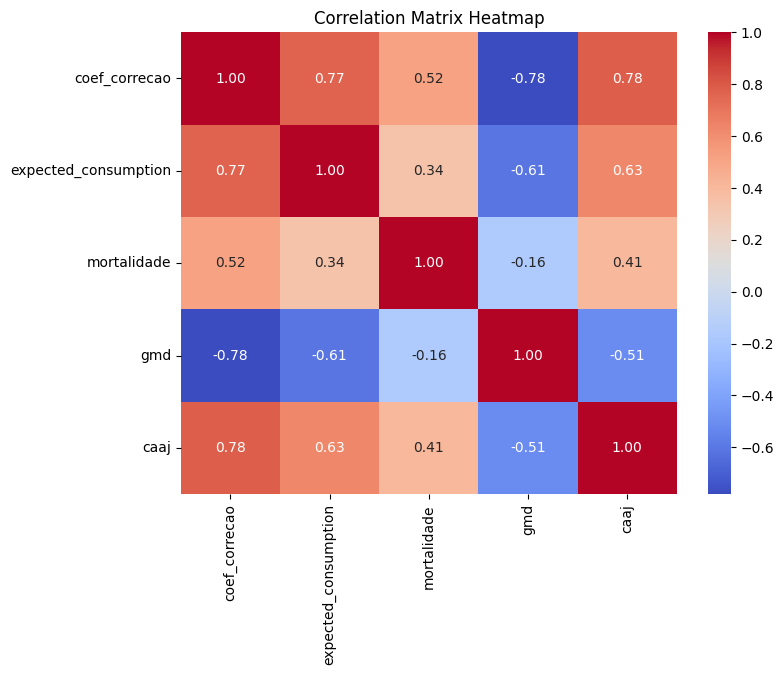

In [69]:
# Cell 8: Validation - Correlation with efficiency indicators
correlation_matrix = df[['coef_correcao', 'expected_consumption', 'mortalidade', 'gmd', 'caaj']].corr()
print("Correlation Matrix:")
print(correlation_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

In [70]:
# Cell 11: Placeholder for actual consumption validation

# If actual consumption data is available, replace this section
# Assume a column 'actual_consumption' exists in the dataset

# Example: Load actual consumption data from a CSV file
# df['actual_consumption'] = pd.read_csv('actual_consumption_data.csv')['consumption']

# Example: Simulate actual consumption data (replace with your actual data loading)
df['actual_consumption'] = df['expected_consumption'] * (1 + np.random.normal(0, 0.05, len(df))) # Simulate with 5% noise

df['abs_error_actual'] = abs(df['adjusted_consumption'] - df['actual_consumption'])
mae_actual = df['abs_error_actual'].mean()
df['abs_percent_error_actual'] = df['abs_error_actual'] / df['actual_consumption'].replace(0, np.nan) * 100
mape_actual = df['abs_percent_error_actual'].mean()
print(f"MAE (Actual): {mae_actual:.2f} units of feed")
print(f"MAPE (Actual): {mape_actual:.2f}%")

MAE (Actual): 10.38 units of feed
MAPE (Actual): 4.05%
